In [1]:
import pandas as pd

In [3]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
print("Elevvo Task")

Elevvo Task


In [5]:
df = pd.read_excel("OnlineRetail.xlsx")

C:\Users\HP\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():


In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   Sales        541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.2+ MB


In [8]:
df.shape

(541909, 9)

In [12]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Sales
count,541909.000000,541909,541909.000000,406829.000000,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,17.987795
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,-168469.600000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,3.400000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,9.750000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,17.400000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,168469.600000
std,218.081158,NaN,96.759853,1713.600303,378.810824


In [13]:
df = df.dropna(subset=['CustomerID'])

In [14]:
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

In [15]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype(int)

In [16]:
df.nunique()

InvoiceNo      18536
StockCode       3665
Description     3877
Quantity         302
InvoiceDate    17286
UnitPrice        441
CustomerID      4339
Country           37
Sales           2940
dtype: int64

In [17]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [18]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [19]:
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int64         
 7   Country      397884 non-null  object        
 8   Sales        397884 non-null  float64       
 9   TotalPrice   397884 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 33.4+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,20.34


In [20]:
import datetime as dt

ref_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (ref_date - x.max()).days,   # Recency
    'InvoiceNo': 'nunique',                               # Frequency
    'TotalPrice': 'sum'                                   # Monetary
})

rfm.rename(columns={'InvoiceDate': 'Recency',
                    'InvoiceNo': 'Frequency',
                    'TotalPrice': 'Monetary'}, inplace=True)

rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,326,1,77183.60
12347,2,7,4310.00
12348,75,4,1797.24
12349,19,1,1757.55
12350,310,1,334.40


In [21]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1]).astype(int)
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1,2,3,4,5]).astype(int)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5]).astype(int)

rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
CustomerID,,,,,,,
12346,326,1,77183.60,1,1,5,115
12347,2,7,4310.00,5,5,5,555
12348,75,4,1797.24,2,4,4,244
12349,19,1,1757.55,4,1,4,414
12350,310,1,334.40,1,1,2,112


In [22]:
def segment_customer(rfm):
    if rfm['R_Score'] >= 4 and rfm['F_Score'] >= 4 and rfm['M_Score'] >= 4:
        return 'Champions'
    elif rfm['R_Score'] >= 3 and rfm['F_Score'] >= 3:
        return 'Loyal Customers'
    elif rfm['R_Score'] >= 4:
        return 'Recent Customers'
    elif rfm['F_Score'] >= 4:
        return 'Frequent Buyers'
    elif rfm['M_Score'] >= 4:
        return 'Big Spenders'
    elif rfm['R_Score'] <= 2 and rfm['F_Score'] <= 2:
        return 'At Risk'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)

rfm.groupby('Segment').size().sort_values(ascending=False)

Segment
Loyal Customers     998
At Risk             987
Champions           962
Others              591
Recent Customers    319
Frequent Buyers     275
Big Spenders        206
dtype: int64

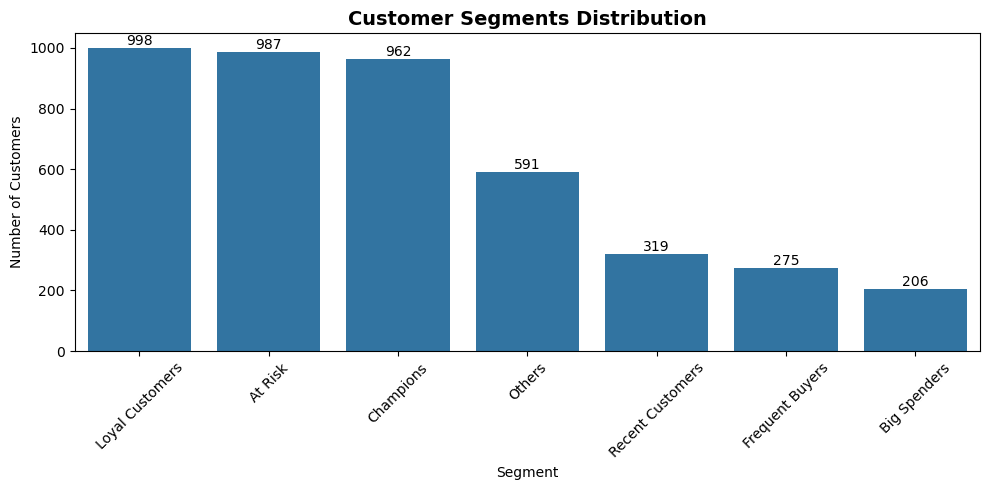

In [23]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index)

for container in ax.containers:
    ax.bar_label(container)

plt.title("Customer Segments Distribution", fontsize=14, weight='bold')
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
rfm_summary = rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(1)

rfm_summary

,Recency,Frequency,Monetary
Segment,,,
At Risk,220.7,1.1,301.4
Big Spenders,143.0,1.9,2494.4
Champions,12.9,11.1,6038.8
Frequent Buyers,137.1,4.9,1575.4
Loyal Customers,34.1,3.7,1477.1
Others,108.6,1.6,401.4
Recent Customers,18.5,1.2,458.2


In [25]:
import pandas as pd

# Adjust Pandas display for readability
pd.set_option("display.max_colwidth", None)
pd.set_option("display.colheader_justify", "center")

# Segment names
segments = [
    "Champions",
    "Loyal Buyers",
    "Newcomers",
    "Regular Shoppers",
    "High-Value Clients",
    "Dormant Customers",
    "Miscellaneous"
]

# Segment descriptions (rephrased)
descriptions = [
    "They buy often, spend heavily, and usually return — your most valuable group.",
    "Purchase frequently, though spending levels vary.",
    "Made their first or recent purchase but haven’t shown consistent patterns yet.",
    "Show up to buy on a regular basis, though their basket size is modest.",
    "Spend a lot when they do shop, but their visits are irregular.",
    "Once active and profitable, but haven’t purchased for some time.",
    "Occasional buyers or low spenders without a clear pattern."
]

# Suggested marketing actions (rephrased)
actions = [
    "Offer premium rewards, early product access, and special recognition.",
    "Keep them engaged through loyalty benefits, tailored offers, and cross-sells.",
    "Send onboarding messages, encourage a second purchase, and showcase popular picks.",
    "Promote discounts on bundles, memberships, or repeat-purchase perks.",
    "Recommend luxury items, add personal touches, and reward high spending.",
    "Run comeback campaigns, offer time-limited deals, and collect feedback.",
    "Use seasonal ads, broad promotions, and general awareness tactics."
]

# Build DataFrame
df_marketing = pd.DataFrame({
    "Segment": segments,
    "Description": descriptions,
    "Suggested Actions": actions
})

df_marketing

,Segment,Description,Suggested Actions
0,Champions,"They buy often, spend heavily, and usually return — your most valuable group.","Offer premium rewards, early product access, and special recognition."
1,Loyal Buyers,"Purchase frequently, though spending levels vary.","Keep them engaged through loyalty benefits, tailored offers, and cross-sells."
2,Newcomers,Made their first or recent purchase but haven’t shown consistent patterns yet.,"Send onboarding messages, encourage a second purchase, and showcase popular picks."
3,Regular Shoppers,"Show up to buy on a regular basis, though their basket size is modest.","Promote discounts on bundles, memberships, or repeat-purchase perks."
4,High-Value Clients,"Spend a lot when they do shop, but their visits are irregular.","Recommend luxury items, add personal touches, and reward high spending."
5,Dormant Customers,"Once active and profitable, but haven’t purchased for some time.","Run comeback campaigns, offer time-limited deals, and collect feedback."
6,Miscellaneous,Occasional buyers or low spenders without a clear pattern.,"Use seasonal ads, broad promotions, and general awareness tactics."


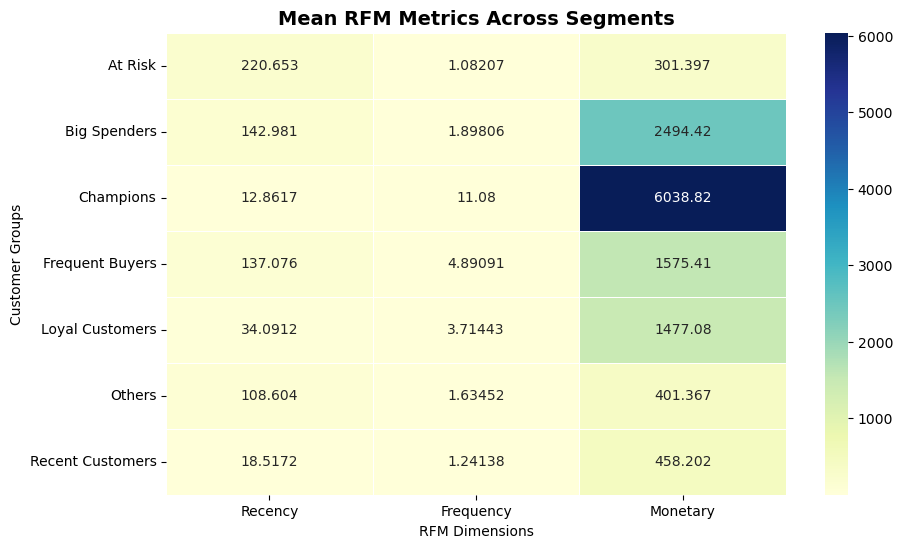

In [30]:
# Compute mean RFM scores by customer segment
segment_summary = (
    rfm.groupby("Segment")[["Recency", "Frequency", "Monetary"]]
       .mean()
)

# Draw heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    segment_summary,
    annot=True,          # show values inside cells
    cmap="YlGnBu",
    linewidths=0.5,
    fmt="g"
)
plt.title("Mean RFM Metrics Across Segments", fontsize=14, fontweight="bold")
plt.ylabel("Customer Groups")
plt.xlabel("RFM Dimensions")
plt.show()


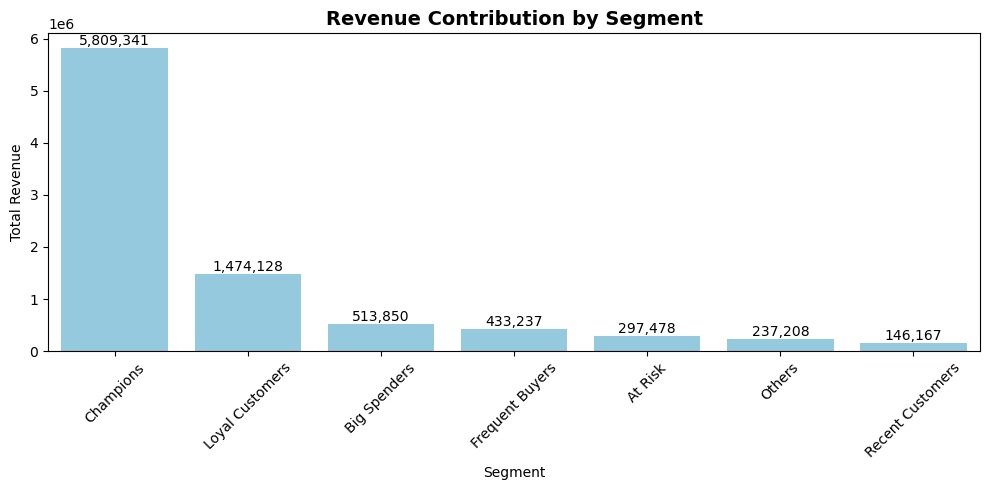

In [31]:
segment_revenue = rfm.groupby("Segment")["Monetary"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=segment_revenue.index, y=segment_revenue.values, color="skyblue")

plt.title("Revenue Contribution by Segment", fontsize=14, weight='bold')
plt.ylabel("Total Revenue")
plt.xlabel("Segment")

for i, v in enumerate(segment_revenue.values):
    plt.text(i, v, f"{v:,.0f}", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

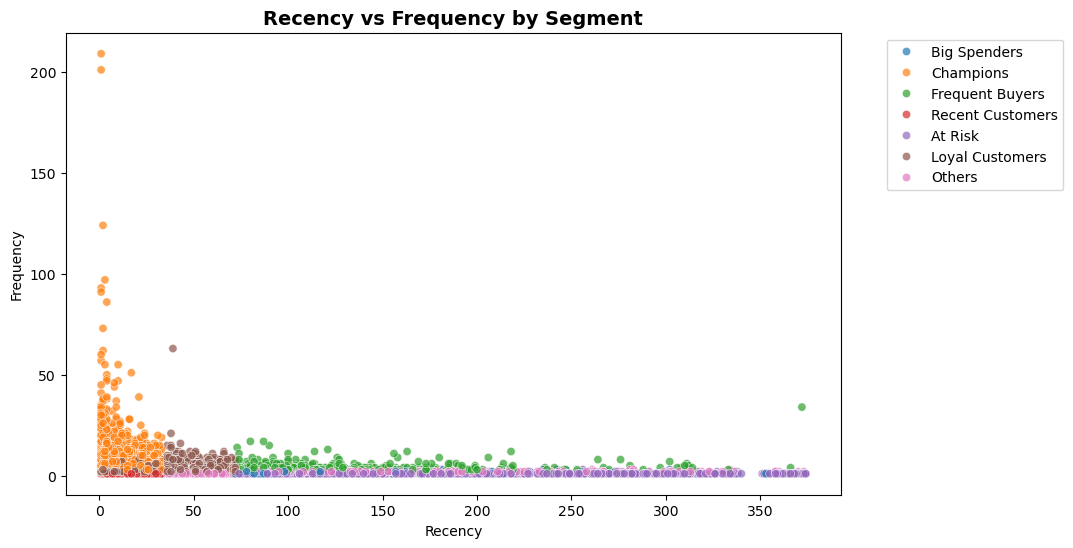

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x="Recency", y="Frequency", hue="Segment", alpha=0.7)
plt.title("Recency vs Frequency by Segment", fontsize=14, weight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()